# PCA and Factor Analysis for APT           (2026.02.18)

## 1. Motivation

공인회계사 시험을 준비하는 과정에서 재무관리는 단순한 계산 과목이라기보다, 통계적 사고와 연결될 수 있는 영역이라는 점에서 흥미롭게 다가왔다. 특히 응용통계학을 전공하면서 재무관리의 여러 주제들이 데이터 분석 관점에서 확장될 수 있는 여지가 크다고 느꼈다.

수험 목적에서는 차익거래가격결정모형(APT)을 주어진 요인과 베타 값에 대입하여 기대수익률을 계산하는 수준에서 다루는 경우가 많다. 그러나 APT는 본질적으로 **공통요인에 의해 자산 수익률이 설명된다는 통계적 요인모형**에 기반하고 있다.

실무 데이터 분석에서는 이러한 공통요인을 추출하기 위해 **주성분분석(PCA)** 이 자주 활용되며, 이론적으로는 **요인분석(Factor Analysis)** 이 APT의 구조적 기반에 해당한다.  

따라서 동일한 수익률 데이터를 대상으로 PCA와 Factor Analysis를 각각 수행하고,

- 공통요인 추출 방식의 차이  
- 설명력의 차이  
- APT 관점에서의 해석 가능성  

을 비교함으로써, 차익거래모형을 데이터 기반에서 어떻게 이해할 수 있는지 살펴보고자 한다.

---

## 2. APT and the Factor Model

APT는 자산 수익률이 여러 개의 체계적 요인에 의해 결정된다고 가정한다. 기본적인 요인모형은 다음과 같이 표현된다.

$$
R_i = E(R_i) + b_{i1}F_1 + b_{i2}F_2 + \cdots + b_{ik}F_k + \varepsilon_i
$$

where

- $R_i$ : 자산 $i$ 의 실제 수익률  
- $E(R_i)$ : 기대수익률  
- $F_k$ : 공통요인 (systematic factors)  
- $b_{ik}$ : 요인민감도 (factor loading)  
- $\varepsilon_i$ : 개별요인 (idiosyncratic risk)  

이 모형은 자산 수익률을 **공통요인에 의한 부분과 개별오차로 분해**하는 구조를 가진다.

---

## 3. Assumptions of the Factor Model

요인모형은 다음과 같은 기본 가정을 따른다.

### (1) 공통요인의 평균

$$
E(F_k) = 0
$$

공통요인은 평균이 0인 확률변수로 가정된다.

---

### (2) 개별오차의 평균

$$
E(\varepsilon_i) = 0
$$

개별요인은 체계적 편향 없이 평균적으로 0이다.

---

### (3) 공통요인 간 독립성

$$
Cov(F_j, F_k) = 0 \quad (j \neq k)
$$

각 요인은 서로 독립적인 정보원을 반영한다.

---

### (4) 공통요인과 개별오차의 독립성

$$
Cov(F_k, \varepsilon_i) = 0
$$

체계적 요인과 개별위험은 서로 독립이다.

---

### (5) 개별오차 간 독립성

$$
Cov(\varepsilon_i, \varepsilon_j) = 0 \quad (i \neq j)
$$

개별위험은 자산 간에 상관되지 않는다.

---

## 4. Variance Decomposition and Explanatory Power

요인모형의 중요한 특징은 자산 수익률의 분산을 **체계적 요인에 의해 설명되는 부분과 비체계적 위험으로 분해**할 수 있다는 점이다.

자산 $i$ 의 분산은 다음과 같이 표현된다.

$$
Var(R_i) = \sum_{k=1}^{K} b_{ik}^2 Var(F_k) + Var(\varepsilon_i)
$$

이를 통해

- 첫 번째 항: 공통요인에 의해 설명되는 분산 (systematic variance)  
- 두 번째 항: 개별요인에 의한 분산 (idiosyncratic variance)  

으로 구분된다.

요인모형의 설명력은 다음과 같이 해석할 수 있다.

$$
\text{Explained Ratio}
=
\frac{\sum_{k=1}^{K} b_{ik}^2 Var(F_k)}
{Var(R_i)}
$$

즉, 전체 변동성 중 공통요인이 설명하는 비율이 높을수록 해당 요인구조의 설명력이 높다고 볼 수 있다.

이러한 분산분해 구조는 이후 PCA와 Factor Analysis를 비교할 때,

- 얼마나 많은 분산을 설명하는가  
- 설명된 분산의 의미가 무엇인가  

를 평가하는 기준이 된다.

---

본 분석에서는 Python 환경에서 `yfinance` 라이브러리를 활용하여 Yahoo Finance의 공개 시장 데이터를 수집하고, 이를 PCA와 Factor Analysis의 입력 데이터로 사용하였다. 다운로드한 종가 데이터를 기반으로 일별 수익률을 계산하여 분석에 활용하였다.


## 2. Data Preprocessing

prices shape: (2042, 20)
rets shape: (2041, 20)
price columns sample: Index(['AAPL', 'ABBV', 'AMZN', 'BAC', 'GOOGL'], dtype='object')


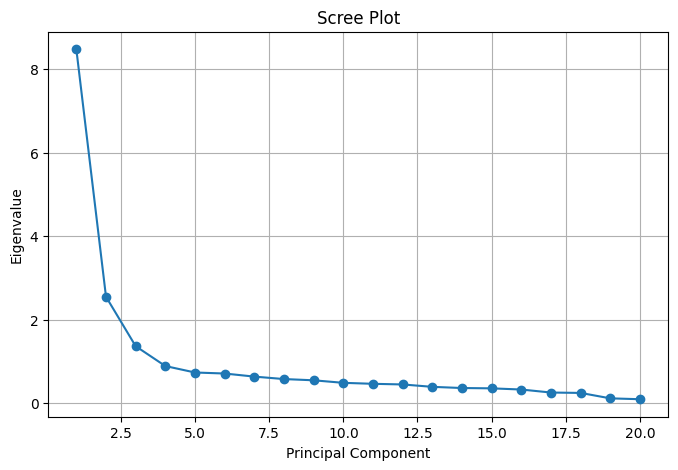

Cumulative explained variance:
PC1: 0.424
PC2: 0.551
PC3: 0.619
PC4: 0.664
PC5: 0.700
PC6: 0.736
PC7: 0.767
PC8: 0.796
PC9: 0.823
PC10: 0.848
PC11: 0.871
PC12: 0.893
PC13: 0.913
PC14: 0.931
PC15: 0.948
PC16: 0.965
PC17: 0.977
PC18: 0.990
PC19: 0.995
PC20: 1.000


In [37]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META",
    "NVDA", "TSLA", "JPM", "XOM", "JNJ",
    "PG", "UNH", "HD", "V", "MA",
    "KO", "PEP", "MRK", "ABBV", "BAC"
]

start = "2018-01-01"
end = None  # 오늘까지

raw = yf.download(
    tickers,
    start=start,
    end=end,
    group_by="column",
    auto_adjust=False,   # Adj Close가 제공되면 쓰기 위해 False
    progress=False,
    threads=True
)

def pick_price(df: pd.DataFrame, prefer: str = "Adj Close") -> pd.DataFrame:
    """
    yfinance 결과에서 (Date x Ticker) 가격 DataFrame 반환.
    - MultiIndex 컬럼 순서가 (Field, Ticker)이든 (Ticker, Field)이든 모두 지원
    - prefer 우선: "Adj Close" -> 없으면 "Close"
    """
    # MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        lv0 = df.columns.get_level_values(0)
        lv1 = df.columns.get_level_values(1)

        fields = [prefer, "Close"] if prefer != "Close" else ["Close", "Adj Close"]

        # Case A: (Field, Ticker)
        if any(f in lv0 for f in fields):
            for f in fields:
                if f in lv0:
                    px = df[f]  # columns become tickers
                    px = px.copy()
                    px.columns.name = None
                    return px

        # Case B: (Ticker, Field)
        if any(f in lv1 for f in fields):
            for f in fields:
                if f in lv1:
                    px = df.xs(f, level=1, axis=1)  # columns become tickers
                    px = px.copy()
                    px.columns.name = None
                    return px

        raise KeyError(
            f"가격 컬럼({fields})을 못 찾음. "
            f"level0 예시={sorted(set(lv0))[:8]}, level1 예시={sorted(set(lv1))[:8]}"
        )

    # Single-level columns (단일 티커일 때)
    cols = df.columns
    if prefer in cols:
        return df[[prefer]].rename(columns={prefer: tickers[0]})
    if "Close" in cols:
        return df[["Close"]].rename(columns={"Close": tickers[0]})

    raise KeyError(f"가격 컬럼(Adj Close/Close) 없음. 컬럼: {list(cols)}")


prices = pick_price(raw)

# 결측치 처리(상장일 차이 등)
prices = prices.dropna(how="all").ffill().dropna()

# 일간 로그수익률
rets = np.log(prices).diff().dropna()

print("prices shape:", prices.shape)
print("rets shape:", rets.shape)
print("price columns sample:", prices.columns[:5])
prices.tail()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# =========================
# Scree Plot (PCA)
# =========================

# PCA는 평균 0 기준이 좋으므로 표준화 (공분산 기반으로 해석하려면 그대로 써도 되지만, 보통 표준화 권장)
rets_std = (rets - rets.mean()) / rets.std()

# PCA 수행
pca = PCA()
pca.fit(rets_std)

# 고유값 (= 설명된 분산)
eigenvalues = pca.explained_variance_

# 설명비율
explained_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# 누적 설명비율 (참고 출력)
cum_ratio = np.cumsum(explained_ratio)
print("Cumulative explained variance:")
for i, v in enumerate(cum_ratio, 1):
    print(f"PC{i}: {v:.3f}")



요인 수 결정을 위해 Scree plot을 확인한 결과, 초기 몇 개의 고유값이 급격히 감소한 이후 3~4번째 요인부터 완만한 감소 형태를 보였다. 이는 해당 지점 이후의 추가 요인이 설명력 증가에 크게 기여하지 않음을 의미한다.

또한 Kaiser 기준(eigenvalue > 1)을 적용한 결과 역시 약 3~4개의 요인이 유지되는 것으로 나타났다. 따라서 이후 분석에서는 주요 공통요인을 반영하면서도 과도한 차원 증가를 방지하기 위해 요인 수를 3~4개 수준으로 설정하였다.


## 3. Factor Analysis and Summary

3요인을 사용하기로 결정했고 이에 대한 수행결과는 아래와 같다.

In [ ]:
import sys, subprocess
subprocess.run(
    [sys.executable, "-m", "pip", "install", "-q", "scikit-learn"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL
)

from sklearn.decomposition import FactorAnalysis

# 종목별 변동성(스케일) 차이가 요인 추정을 지배하지 않도록, FA에도 표준화된 수익률(rets_std)을 입력
returns = rets_std            
X = returns      

fa = FactorAnalysis(n_components=3, random_state=0)
factors = fa.fit_transform(X)

# Factor Loadings
loadings = pd.DataFrame(
    fa.components_.T,
    index=returns.columns,
    columns=["Factor1", "Factor2", "Factor3"]
)

loadings.round(3)


,Factor1,Factor2,Factor3
AAPL,-0.692,-0.385,0.036
ABBV,-0.457,0.006,-0.259
AMZN,-0.566,-0.499,0.247
BAC,-0.830,0.382,0.193
GOOGL,-0.654,-0.420,0.165
HD,-0.677,-0.130,-0.121
JNJ,-0.500,0.040,-0.470
JPM,-0.838,0.387,0.180
KO,-0.599,0.081,-0.545
MA,-0.787,-0.148,-0.024


In [39]:
top_k = 7
print(loadings.abs().sort_values("Factor1", ascending=False).head(top_k))
print(loadings.abs().sort_values("Factor2", ascending=False).head(top_k))
print(loadings.abs().sort_values("Factor3", ascending=False).head(top_k))
communalities = (loadings**2).sum(axis=1).sort_values(ascending=False)
print(communalities.head(10))

fa_loadings = loadings.copy()

fa_scores = pd.DataFrame(
    fa.transform(rets_std),
    index=rets_std.index,
    columns=["F1", "F2", "F3"]
)

       Factor1   Factor2   Factor3
JPM   0.837855  0.386849  0.180288
BAC   0.830224  0.382356  0.193400
V     0.790221  0.127061  0.035865
MA    0.786820  0.147609  0.024475
MSFT  0.717915  0.479537  0.081679
AAPL  0.692198  0.384734  0.035970
HD    0.676841  0.130035  0.120786
        Factor1   Factor2   Factor3
AMZN   0.566025  0.499373  0.247013
MSFT   0.717915  0.479537  0.081679
NVDA   0.563602  0.426394  0.266408
GOOGL  0.654240  0.420427  0.164652
META   0.535283  0.413696  0.213761
JPM    0.837855  0.386849  0.180288
AAPL   0.692198  0.384734  0.035970
       Factor1   Factor2   Factor3
PEP   0.574226  0.047532  0.618640
PG    0.516495  0.045973  0.587949
KO    0.598650  0.080762  0.545396
JNJ   0.499919  0.040346  0.470060
MRK   0.435924  0.017957  0.361058
NVDA  0.563602  0.426394  0.266408
ABBV  0.457142  0.005669  0.259309
JPM      0.884158
BAC      0.872872
MSFT     0.752030
PEP      0.714711
KO       0.662361
V        0.641881
MA       0.641474
GOOGL    0.631899
AMZN    

/Users/swayer/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FactorAnalysis was fitted without feature names
  warnings.warn(


## 4. Interpretation of Factor Structure

요인분석 결과, APT 일반식의 요인베타에 해당하는 factor loading을 기준으로 각 요인에 가장 민감하게 반응하는 상위 7개 종목을 확인하였다. 또한 Communality 기준으로 추정된 세 개의 공통요인에 의해 가장 잘 설명되는 종목은 **GOOGL**, **AMZN**, **AAPL**로 나타났으며, 이는 이들 종목의 수익률 변동이 공통요인의 영향을 크게 받음을 의미한다.

Factor Analysis는 자산 수익률의 공분산 구조를 가장 잘 설명하는 공통요인을 통계적으로 추출하고, 각 자산의 요인 민감도(loading)를 추정하는 방법이다. 그러나 이 과정에서 도출되는 요인은 순전히 통계적 기준에 의해 결정되며, 요인 자체에 대한 경제적 의미가 자동으로 부여되는 것은 아니다. 따라서 각 요인이 시장요인, 금리요인, 경기요인 등 어떠한 위험을 반영하는지는 상위 loading 종목의 특성과 거시경제적 맥락을 바탕으로 분석자가 해석해야 한다는 한계가 있다.

이러한 점을 고려하여, 각 요인의 경제적 의미를 해석하면 다음과 같다.

## Factor 1 : Market Factor

대부분의 종목에서 양(+)의 loading이 나타났으며, 특히 메가캡 기술주와 대형주에서 높은 값을 보였다. 이는 전체 시장 움직임에 대한 공통 민감도를 반영하는 요인으로 해석할 수 있다. 즉, 시장 전반의 상승 또는 하락에 따라 광범위한 자산이 동시에 반응하는 체계적 위험을 나타낸다.

## Factor 2 : Financial / Interest Rate Factor

금융 관련 종목에서 상대적으로 높은 loading이 나타났다. 은행 및 금융업은 금리 수준과 신용환경 변화에 민감하게 반응하므로, 해당 요인은 금리 또는 금융환경 변화와 관련된 위험요인으로 해석할 수 있다.

## Factor 3 : Energy / Cyclical Factor

에너지 및 경기민감 업종에서 높은 loading이 관찰되었다. 이는 원자재 가격이나 경기순환과 관련된 요인을 반영하는 것으로 볼 수 있으며, 거시경제 환경 변화에 따른 산업별 민감도를 나타낸다.

이러한 결과는 자산 수익률이 소수의 공통요인에 의해 설명될 수 있음을 보여주며, Factor Analysis를 통해 도출된 요인은 APT 모형에서의 체계적 요인(Systematic Factors)으로 해석할 수 있다.

## 5. Principal Component Analysis (PCA)

Factor Analysis가 요인모형의 구조적 가정을 기반으로 공통요인을 추정하는 방법이라면, 주성분분석(PCA)은 데이터의 분산 구조만을 이용하여 공통 변동 요인을 추출하는 비모수적 차원축소 기법이다.

PCA의 목적은 자산 수익률의 변동성을 최대한 보존하면서, 더 적은 수의 선형결합 변수로 데이터를 표현하는 것이다. 이때 생성되는 새로운 변수들을 주성분(Principal Components)이라고 한다.

---

## 6. Data Representation

표준화된 수익률 행렬을 다음과 같이 정의한다.

$$
X \in \mathbb{R}^{T \times N}
$$

where

- $T$ : 관측기간 수  
- $N$ : 자산 수  
- 각 열은 평균이 0, 분산이 1이 되도록 표준화된 수익률

PCA는 이 데이터의 공분산 구조를 기반으로 수행된다.

---

## 7. Covariance Matrix

표본 공분산 행렬은 다음과 같다.

$$
\Sigma = \frac{1}{T-1} X^\top X
$$

이 공분산 행렬은 자산 간 공통 변동 구조를 나타낸다.

---

## 8. Eigenvalue Decomposition

PCA는 공분산 행렬에 대해 고유값 분해를 수행한다.

$$
\Sigma = V \Lambda V^\top
$$

where

- $V = [v_1, v_2, \dots, v_N]$ : 고유벡터 행렬  
- $\Lambda = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_N)$ : 고유값 행렬  
- $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_N$

각 고유값은 해당 방향이 설명하는 분산의 크기를 의미한다.

---

## 9. Principal Components

$k$번째 주성분은 다음과 같이 정의된다.

$$
F_k = X v_k
$$

주성분들은 서로 직교하며 다음을 만족한다.

$$
\mathrm{Cov}(F_j, F_k) = 0 \quad (j \neq k)
$$

즉, PCA는 서로 상관된 자산 수익률을 서로 독립적인 변동 요인으로 변환한다.

---

## 10. Explained Variance

전체 분산 중 $k$번째 주성분이 설명하는 비율은 다음과 같다.

$$
\text{Explained Variance Ratio}_k
=
\frac{\lambda_k}{\sum_{i=1}^{N} \lambda_i}
$$

누적 설명력은 다음과 같이 계산된다.

$$
\text{Cumulative Variance}(m)
=
\sum_{k=1}^{m}
\frac{\lambda_k}{\sum_{i=1}^{N} \lambda_i}
$$

Scree Plot을 통해 고유값의 감소 패턴을 확인하고 적절한 주성분 개수를 선택할 수 있다.

---

## 11. PCA and the Factor Structure

상위 $K$개의 주성분만 사용할 경우, 수익률 행렬은 다음과 같이 근사된다.

$$
X \approx F_K V_K^\top
$$

이를 개별 자산 관점에서 표현하면,

$$
R_i \approx b_{i1}F_1 + b_{i2}F_2 + \cdots + b_{iK}F_K
$$

이는 형식적으로 APT의 요인모형과 유사한 구조를 갖는다.

---

## 12. Interpretation in the APT Context

PCA를 통해 얻어지는 주성분은 데이터의 분산을 가장 잘 설명하는 통계적 요인이며, 경제적 의미가 사전에 부여된 요인은 아니다.

따라서 PCA는 공통요인을 데이터 기반으로 추정할 수 있다는 장점이 있지만,

- 분산 최대화 기준으로 요인을 추출하며  
- 개별위험을 명시적으로 분리하지 않고  
- 구조적 모형 가정을 포함하지 않는다  

는 점에서 Factor Analysis와 구분된다.


## 13. PCA in the APT and Summary

위의 요인분석에서 사용한 price와 return 데이터를 활용하여 그대로 주성분분석이 가능하며, 용이한 비교를 위해 주성분을 3개로 잡아 분석을 수행하였다.
수행결과는 아래와 같다.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


X = rets_std.values  

# 1) PCA (3 components)
pca = PCA(n_components=3)
scores_array = pca.fit_transform(X)

# 2) 설명분산비율
evr = pca.explained_variance_ratio_
print("Explained variance ratio:", evr)
print("Cumulative explained variance:", evr.cumsum())

# 3) Loadings - 종목의 기여도
loadings = pd.DataFrame(
    pca.components_.T,
    index=rets_std.columns,
    columns=["PC1", "PC2", "PC3"]
)

# 4) Scores - 주성분 (FA에서의 요인과 대응)
scores = pd.DataFrame(
    scores_array,
    index=rets_std.index,
    columns=["PC1", "PC2", "PC3"]
)

# 확인
print("\nTop |loading| in PC1")
print(loadings["PC1"].abs().sort_values(ascending=False).head(10))

scores.head()

pca_loadings = loadings.copy()
pca_scores = scores.copy()

# === PC1이 가장 크게/작게 반응한 날짜 ===
pc1 = scores["PC1"]

max_day = pc1.idxmax()
min_day = pc1.idxmin()

print("\n[PC1 Extreme Days]")
print(f"PC1 최대 날짜: {max_day} | PC1 값: {pc1.loc[max_day]:.6f}")
print(f"PC1 최소 날짜: {min_day} | PC1 값: {pc1.loc[min_day]:.6f}")

# 상위 3일
n = 3
top_days = pc1.sort_values(ascending=False).head(n)

print(f"\nTop {n} PC1 days")
print(top_days)




Explained variance ratio: [0.42364386 0.12735308 0.0681563 ]
Cumulative explained variance: [0.42364386 0.55099694 0.61915324]

Top |loading| in PC1
V        0.282577
MA       0.281779
MSFT     0.269247
AAPL     0.260994
HD       0.248745
JPM      0.246946
GOOGL    0.244985
BAC      0.244663
PEP      0.218799
KO       0.216948
Name: PC1, dtype: float64


## 14. Interpretation of PCA Structure

주성분분석 결과, 표준화된 수익률을 기준으로 추출된 세 개의 주성분은 전체 변동의 약 62%를 설명하는 것으로 나타났다. 특히 첫 번째 주성분(PC1)은 단일 요인만으로 약 42%의 분산을 설명하여, 개별 종목 수익률이 공통된 시장 움직임에 크게 영향을 받고 있음을 보여준다.

PC1의 loading을 기준으로 확인한 결과, 금융(V, MA, JPM, BAC), 기술(MSFT, AAPL, GOOGL), 소비재(KO, PEP), 리테일(HD) 등 다양한 업종의 종목들이 동일한 방향으로 높은 값을 보였다. 이는 특정 산업이나 스타일 요인이라기보다는, 시장 전반의 상승 또는 하락과 함께 움직이는 공통 요인의 특성을 나타낸다. 따라서 첫 번째 주성분은 시장 전체의 체계적 위험을 반영하는 **시장요인(Market Factor)**으로 해석할 수 있다.

또한 PCA score는 각 시점에서 해당 주성분이 얼마나 크게 실현되었는지를 의미한다. 특히 PCA의 score를 시계열 관점에서 살펴보면, 특정 시점에서 공통요인의 영향이 얼마나 크게 나타났는지를 확인할 수 있다는 점에서 요인분석과 구별되는 장점이 있다.
예를 들어, 2018년 1월 초 구간에서 PC1 값이 크게 양(+)의 수준을 보이는 것은 해당 시기에 시장 전반에 걸친 강한 상승 압력이 존재했음을 의미한다. 실제로 2018년 1월 4일에는 S&P500과 Dow 지수가 사상 최고치를 경신하며 기록적인 상승 흐름을 나타냈다. 이러한 시장 랠리는 트럼프 행정부의 법인세 인하 시행에 따른 기업 이익 증가 기대와 경기 낙관 심리가 반영된 결과로 평가된다.

이처럼 PCA는 특정 시점에서 시장 전체에 영향을 미친 거시적 이벤트가 공통요인에 어떻게 반영되었는지를 직접적으로 확인할 수 있으며, 이는 단순히 요인의 구조만을 설명하는 요인분석과 달리 시계열적 해석이 가능하다는 점에서 차별적인 의미를 가진다.

한편 두 번째와 세 번째 주성분은 각각 약 13%, 7% 수준의 추가적인 분산을 설명하며, 이는 시장요인 외에 존재하는 업종 또는 스타일 차이에 따른 구조적 변동을 반영하는 것으로 볼 수 있다.

다만 PCA 역시 요인분석과 마찬가지로 순수하게 통계적 기준에 의해 요인을 추출하는 방법이므로, 각 주성분이 구체적으로 어떤 경제적 위험요인을 의미하는지는 loading의 특성과 시장 환경을 바탕으로 분석자가 해석해야 한다는 한계가 존재한다.


## 15. Consistency Between PCA and Factor Analysis

PCA와 Factor Analysis는 서로 다른 통계적 접근을 사용하지만, 동일한 데이터에서 공통요인을 추출한다는 점에서 결과의 유사성을 비교해볼 필요가 있다. 이를 위해 두 방법에서 추정된 요인의 구조와 시계열 움직임이 얼마나 유사한지를 확인하고자, 각 요인 간 loading과 score의 상관관계를 계산하였다.

Loading 상관은 자산별 요인 민감도의 구조적 유사성을 의미하며, Score 상관은 시간에 따른 요인의 변동 패턴이 얼마나 유사한지를 보여준다.


In [41]:
import numpy as np
import pandas as pd


fa_cols = list(fa_scores.columns[:3])
pca_cols = list(pca_scores.columns[:3])

score_corr = pd.DataFrame(index=pca_cols, columns=fa_cols, dtype=float)

for pc in pca_cols:
    for f in fa_cols:
        score_corr.loc[pc, f] = np.corrcoef(pca_scores[pc], fa_scores[f])[0, 1]

print("\nScore correlation")
print(score_corr)


fa_lcols = list(fa_loadings.columns[:3])
pca_lcols = list(pca_loadings.columns[:3])

loading_corr = pd.DataFrame(index=pca_lcols, columns=fa_lcols, dtype=float)

for pc in pca_lcols:
    for f in fa_lcols:
        loading_corr.loc[pc, f] = np.corrcoef(pca_loadings[pc], fa_loadings[f])[0, 1]

print("\nLoading correlation")
print(loading_corr)



Score correlation
           F1        F2        F3
PC1 -0.970214 -0.194502 -0.112518
PC2  0.008726 -0.556411  0.806305
PC3 -0.196537  0.743231  0.521512

Loading correlation
      Factor1   Factor2   Factor3
PC1 -0.909586 -0.169583  0.270942
PC2 -0.206525 -0.717006  0.892444
PC3 -0.521077  0.668581  0.420787


분석 결과, PCA의 첫 번째 주성분(PC1)과 Factor Analysis의 첫 번째 요인(Factor1) 간에 매우 높은 상관관계가 확인되었다. Score 기준 상관계수는 약 -0.97, Loading 기준 상관계수는 약 -0.91로 나타났다. 부호(sign)는 PCA와 FA에서 요인의 방향이 임의적으로 결정될 수 있기 때문에 해석상 중요하지 않으며, 절대값 기준으로 볼 때 두 방법이 동일한 요인을 추출하고 있음을 의미한다.

이는 두 방법 모두 시장 전반의 공통 움직임을 반영하는 **시장요인(Market Factor)**을 가장 지배적인 요인으로 식별하고 있음을 시사한다.

한편 두 번째와 세 번째 요인은 서로 완전히 일치하지는 않지만, 일정 수준 이상의 상관관계를 보이며 부분적인 대응 관계가 확인된다. 예를 들어 PC2는 Factor3와 높은 양의 상관을 보였으며, PC3는 Factor2와 비교적 높은 상관을 나타냈다. 이는 시장요인 외의 추가 요인에 대해서는 PCA와 FA가 일부 다른 방향으로 분산 구조를 설명하고 있음을 의미한다.

종합하면, PCA와 Factor Analysis는 서로 다른 방법론을 사용함에도 불구하고 가장 중요한 공통요인인 시장요인에 대해서는 매우 일관된 결과를 제공하며, 추가 요인에 대해서는 분산 설명 방식의 차이에 따라 일부 구조적 차이가 나타나는 것으로 해석할 수 있다. 


 ## In Closing

APT는 이론적으로 자산 수익률이 소수의 공통요인에 의해 설명된다는 요인모형에 기반하므로, 공통요인을 추정하는 방법으로는 Factor Analysis가 보다 직접적인 접근이라고 볼 수 있다. 그러나 실무 데이터 분석에서는 PCA 역시 공분산 구조를 효과적으로 요약하고 주요 변동 요인을 식별하는 방법으로 널리 활용된다.

본 분석에서는 이러한 점을 고려하여 Factor Analysis와 PCA를 함께 적용하고, 두 방법에서 추출된 요인의 구조와 시계열 움직임을 비교하였다. 그 결과, 두 방법 모두 시장 전반의 공통 움직임을 반영하는 지배적인 요인을 일관되게 식별하고 있음을 확인할 수 있었다. 이는 서로 다른 통계적 접근에도 불구하고, 실제 자산 수익률 데이터에는 강한 공통요인이 존재함을 시사한다.

다만 두 방법 모두 순수하게 통계적 기준에 의해 요인을 추출하기 때문에, 추정된 요인이 구체적으로 어떤 경제적 위험요인을 의미하는지는 추가적인 해석과 외부 정보가 필요하다. 또한 PCA는 분산 설명에 초점을 두는 반면, Factor Analysis는 공통요인과 고유위험을 분리한다는 점에서 목적상의 차이가 존재한다.

결론적으로, PCA는 데이터의 주요 변동 구조와 시장 충격의 시계열적 특성을 파악하는 데 유용하며, Factor Analysis는 공통요인의 구조를 보다 이론적으로 해석하는 데 적합하다. 두 방법을 함께 활용함으로써, 자산 수익률에 내재된 공통요인의 구조와 동태를 보다 종합적으로 이해할 수 있었다.
